In [1]:

import numpy as np
import pandas as pd

import torch
 
from matplotlib import pyplot as plt

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### bias decreases as size become larger

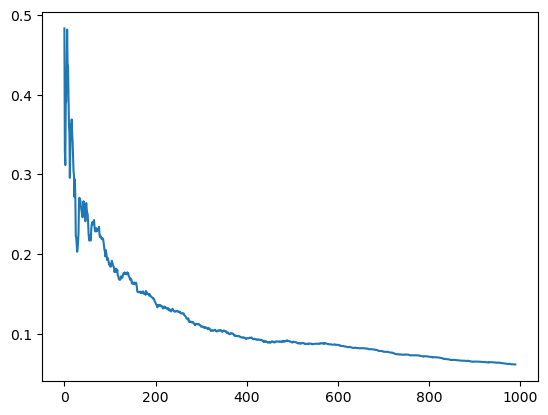

In [15]:
epsilons=[]
errs=[]
bias=[]
for i in range(10,1000):
    np.random.seed(1)
    epsilon = np.random.normal(0, 1, i)
    X = np.array(np.random.normal(0, 1, i))
    Y = np.array(np.random.normal(0, 2, i))
    X = np.c_[np.ones(X.shape[0]), X]


# Calculate the coefficients using least squares
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Calculate the predicted values
    Y_pred = X.dot(coefficients)

# Calculate the residuals
    residuals = Y - Y_pred


# Calculate RSE
    
    rse = np.sqrt(np.sum(residuals**2) / (len(Y) - X.shape[1]))
    epsilon = np.abs(np.mean(residuals))
    
    err=np.linalg.norm(residuals,2)/i
    errs.append(err)
    bias.append(epsilon)
    #epsilon.append(epsilon)
plt.plot(errs)
    
#np.mean(np.abs(epsilon))
        
    
   

# Print RSE
    #print("RSE:", rse)
    #print("epsilon:", epsilon)


### size increases and accuracy increases, using mse and r2_score

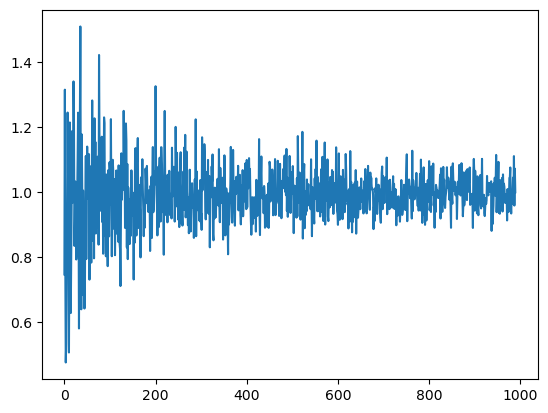

In [26]:
r2s=[]
mses=[]
rmses=[]
for i in range(10,1000):
    #np.random.seed(1)
    epsilon = np.random.normal(0, 1, i)
    X = np.random.normal(0, 1, i).reshape(-1,1)
    Y = np.random.normal(0, 1, i)
    #X = np.c_[np.ones(X.shape[0]), X]


    lr = LinearRegression()

# Fit the model
    lr.fit(X, Y)

# Print the coefficients and intercept
    r2=[]
    beta1_hat = lr.coef_[0]
    beta0_hat = lr.intercept_
    Y_pred = X*beta1_hat+beta0_hat
    r2 = r2_score(Y, Y_pred)
    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)
    mse=mean_squared_error(Y, Y_pred)
    mses.append(mse)
    r2s.append(np.mean(r2))
    #epsilon.append(epsilon)
plt.plot(mses)
    
#np.mean(np.abs(epsilon))
        
    
   

# Print RSE
    #print("RSE:", rse)
    #print("epsilon:", epsilon)

    


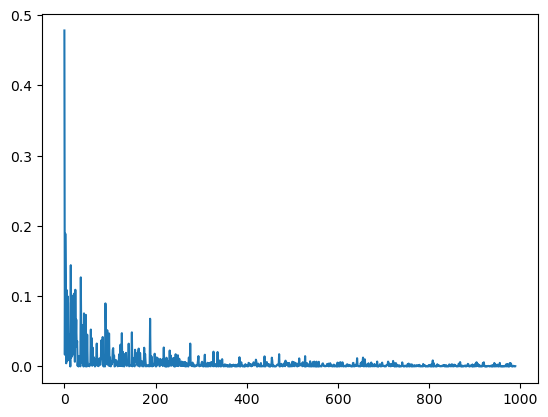

In [27]:
plt.plot(r2s)

# Problem6

In [28]:
delta = 1/252
n=100
mum=0.08*delta
sigmaM=0.16*delta**0.5
sigma2=0.1*delta**0.5
alpha=0

In [31]:
N=5000
count=0
for i in range(N):
    RM = np.random.normal(mum, sigmaM**2, 252).reshape(-1, 1)
    epsilon = np.random.normal(0, sigma2**2, 252).reshape(-1, 1)
    for j in range(100):
        Ri = epsilon + RM
        lr = LinearRegression().fit(RM, Ri)
        beta0_hat = lr.intercept_
        if 0.2*delta<beta0_hat:
            count+=1
            break
count/N

0.0

In [32]:
N=5000
count=0
for i in range(N):
    RM = np.random.normal(mum, sigmaM**2, 252).reshape(-1, 1)
    
    for j in range(100):
        epsilon = np.random.normal(0, sigma2**2, 252).reshape(-1, 1)
        Ri = epsilon + RM
        lr = LinearRegression().fit(RM, Ri)
        beta0_hat = lr.intercept_
        if 0.2*delta > beta0_hat:
            count+=1
            break
count/N

1.0

When alpha = 0, all cases are larger than the threshold. We should accept the null hypothesis